In [49]:
import cv2 as cv
from PIL import ImageGrab
from dataclasses import dataclass
import numpy as np
from matplotlib import pyplot as plt

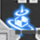

In [27]:
@dataclass
class Coordinate:
    x: int
    y: int

    def __add__(self, other: Coordinate):
        return Coordinate(self.x + other.x, self.y + other.y)

    def __sub__(self, other: Coordinate):
        return Coordinate(self.x - other.x, self.y - other.y)
    

CENTER = Coordinate(540, 340)
PAD_TP = Coordinate(20, 20)

top_left = CENTER - PAD_TP
bottom_right = CENTER + PAD_TP

tp_img = ImageGrab.grab((top_left.x, top_left.y, bottom_right.x, bottom_right.y))
tp_img

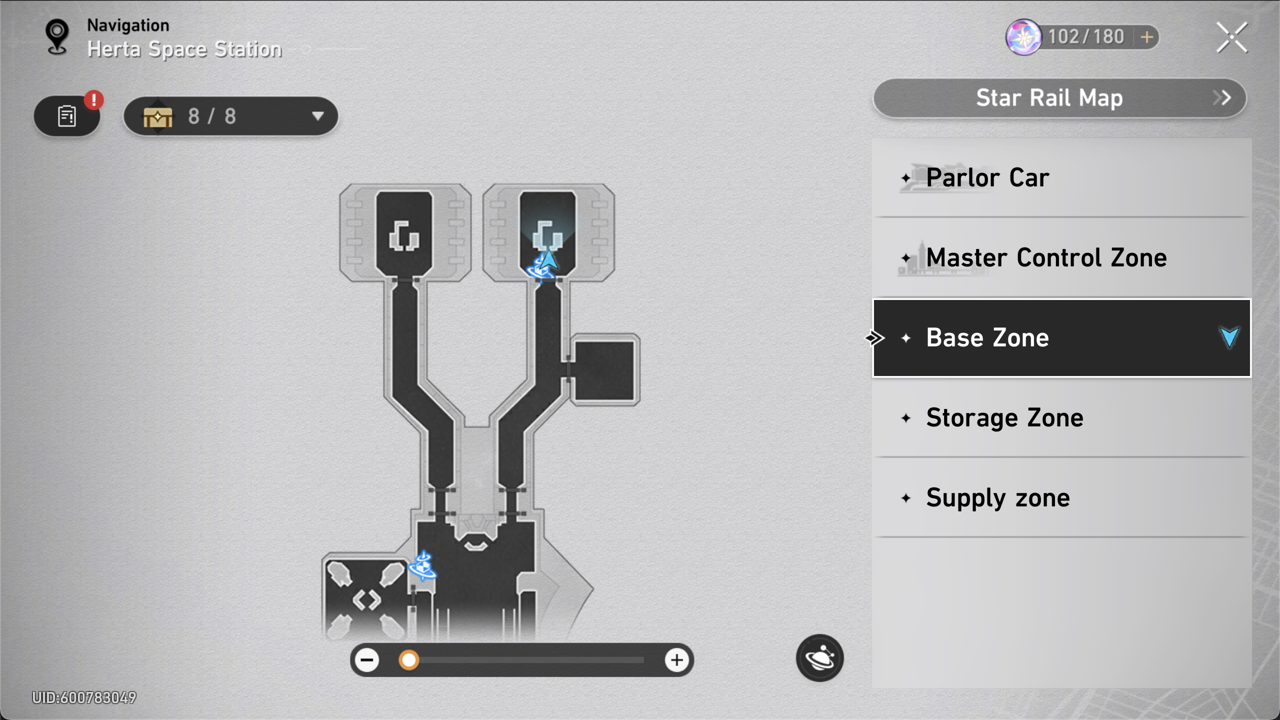

In [55]:
offset = 72
screen = ImageGrab.grab((0,offset,1280,720+offset))
screen

In [56]:
tp_cv = cv.cvtColor(np.array(tp_img), cv.COLOR_RGB2BGR)
screen_cv = cv.cvtColor(np.array(screen), cv.COLOR_RGB2BGR)

tp_gray = cv.cvtColor(tp_cv, cv.COLOR_BGR2GRAY)
screen_gray = cv.cvtColor(screen_cv, cv.COLOR_BGR2GRAY)

In [57]:
result = cv.matchTemplate(screen_cv, tp_cv, cv.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)
top_left = max_loc
bottom_right = (top_left[0] + tp_cv.shape[1], top_left[1] + tp_cv.shape[0])

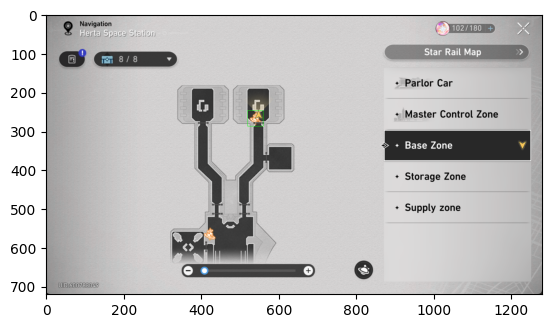

In [58]:
cv.rectangle(screen_cv, top_left, bottom_right, (0, 255, 0), 1)
plt.imshow(screen_cv)